# Rnn and Lstm Test

In [1]:
# Import of python file with customized functions for the process
from funzioniNN import *

Using TensorFlow backend.


In [1]:
path = ''

Load the sequence analyzed in the previous notebook.

In [3]:
x = pickle.load(open(path+'WseqX.pickle', 'rb'))
y = pickle.load(open(path+'WseqY.pickle', 'rb'))

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Setting the parameters for the analysis .

In [5]:
# target variable
YC = y

# max value of the sequences
max_words = 10011

# Dimension of embedding 
dim_embedding = 80

# Max length of the sequence to create the sequence matrix 
max_len = 150

# matrix of the sequences with zeros
sequences_matrix = sequence.pad_sequences(x[0:len(x)],maxlen=max_len)  





## Neural network parameters

In [6]:
batch_size = 15
epochs = 8
validation_split = 0.2

# Rnn model

In [7]:
# Create the model
model = rnnSimple(max_len = max_len,max_words=max_words, dim_embedding=dim_embedding) 

# Summary of the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 80)           800880    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 80)                12880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 813,841
Trainable params: 813,841
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the Rnn model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model to the data:
historyRNN = model.fit(sequences_matrix, YC, epochs=epochs,batch_size=batch_size, 
                       validation_split=validation_split, verbose=1)  

Instructions for updating:
Use tf.cast instead.
Train on 37080 samples, validate on 9270 samples
Epoch 1/8
26460/37080 [====================>.........] - ETA: 41s - loss: 0.5344 - acc: 0.7305

# Rnn Validation Accuracy

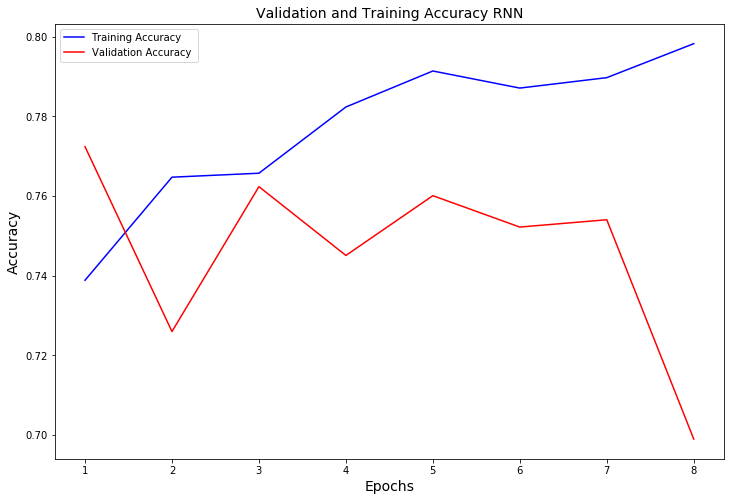

In [32]:
plotValidationAcc(history=historyRNN)

# Rnn Validation Loss

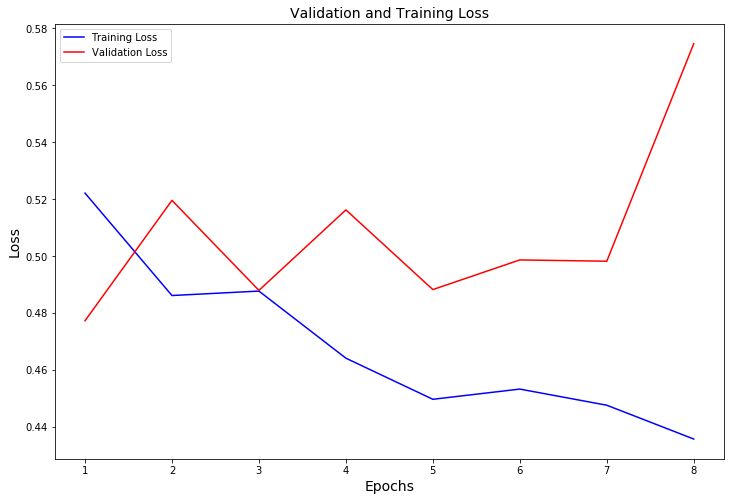

In [24]:
plotValidationLoss(history=historyRNN)

# Lstm model

In [25]:
neurons = 50
neuronsHL = 70
dropOut_rate = 0.4 


In [26]:
# Recap of all parameters chosen for the model:
print('max_len = %s'%max_len,'\n''max_word = %s'%max_words,'\n''dim_embedding = %s'%dim_embedding, 
      '\n''neurons = %s'%neurons,'\n''neuronsHL = %s'%neuronsHL, '\n''dropOut_rate = %s'%dropOut_rate, 
      '\n''epochs = %s'%epochs,'\n''batch_size = %s'% batch_size,'\n''validation_split = %s'%validation_split)

max_len = 150 
max_word = 10011 
dim_embedding = 80 
neurons = 50 
neuronsHL = 70 
dropOut_rate = 0.4 
epochs = 8 
batch_size = 15 
validation_split = 0.2


In [27]:
# Create the Lstm model:
model = LstmR(max_len = max_len,max_words=max_words, dim_embedding= dim_embedding,
              neurons=neurons, neuronsHL=neuronsHL, dropOut_rate=dropOut_rate)

# Summary of the model:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (Embedding)         (None, 150, 80)           800880    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
FC1 (Dense)                  (None, 70)                3570      
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 71        
Total params: 830,721
Trainable params: 830,721
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile Lstm model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model: 
historyLSTM = model.fit(sequences_matrix, YC, epochs=epochs,batch_size=batch_size, validation_split=validation_split) ## good performance 

Train on 37080 samples, validate on 9270 samples
Epoch 1/8
37080/37080 [==============================] - 439s 12ms/step - loss: 0.4955 - acc: 0.7606 - val_loss: 0.4523 - val_acc: 0.7831
Epoch 2/8
37080/37080 [==============================] - 434s 12ms/step - loss: 0.4200 - acc: 0.8113 - val_loss: 0.4346 - val_acc: 0.8063
Epoch 3/8
37080/37080 [==============================] - 439s 12ms/step - loss: 0.3849 - acc: 0.8315 - val_loss: 0.4219 - val_acc: 0.8035
Epoch 4/8
37080/37080 [==============================] - 440s 12ms/step - loss: 0.3492 - acc: 0.8500 - val_loss: 0.4365 - val_acc: 0.7995
Epoch 5/8
37080/37080 [==============================] - 443s 12ms/step - loss: 0.3108 - acc: 0.8688 - val_loss: 0.4724 - val_acc: 0.7906
Epoch 6/8
37080/37080 [==============================] - 445s 12ms/step - loss: 0.2812 - acc: 0.8834 - val_loss: 0.4494 - val_acc: 0.8010
Epoch 7/8
37080/37080 [==============================] - 439s 12ms/step - loss: 0.2529 - acc: 0.8966 - val_loss: 0.5017 - v

# Analysis of results of the two model evaluated.

## Plot of Validation Accuracy 

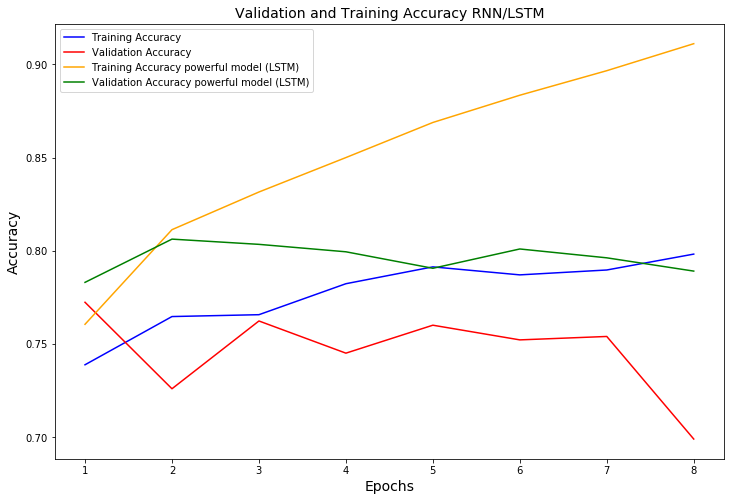

In [29]:
DiffplotValidationAcc(history=historyRNN, historyP=historyLSTM)

## Plot of Validation Loss

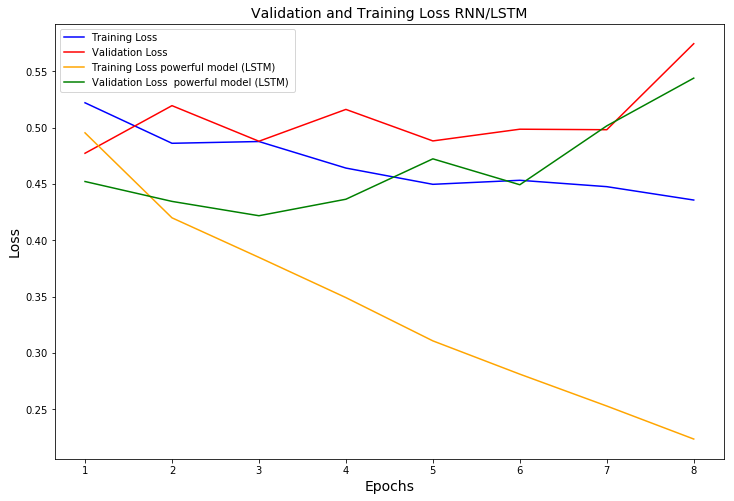

In [30]:
DiffplotValidationLoss(history=historyRNN, historyP=historyLSTM)